In [1]:
import numpy as np
from numpy.linalg import inv

from PIL import Image

from skimage.transform import warp
from skimage import transform

import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from matplotlib.pyplot import ginput
from matplotlib.backend_bases import MouseButton

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
img = np.asarray(Image.open('newyork3.jpg'))

In [3]:
plt.imshow(img)

#pts_src = plt.ginput(4, show_clicks=True, mouse_add=MouseButton.LEFT, mouse_pop=MouseButton.RIGHT, mouse_stop=MouseButton.MIDDLE)

pts_src = np.array([[1959,1050],
                    [2657,913],
                    [2693,1769],
                    [1951,1800]])

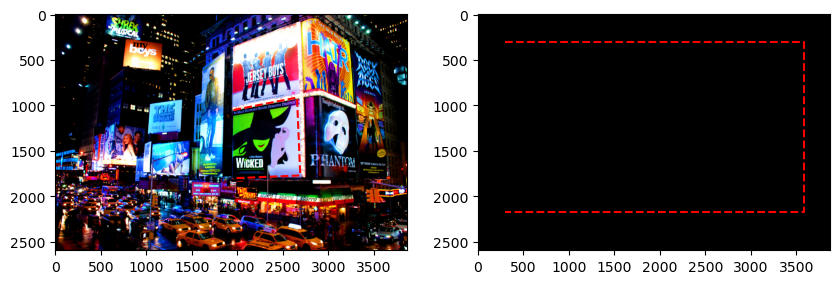

In [4]:
%matplotlib inline
pts_src = np.round_(pts_src)

length = ((max(pts_src[:,0]) - min(pts_src[:,0])) * 2) +1800
width = ((max(pts_src[:,1]) - min(pts_src[:,1])) * 2) +100

x_st = 300
y_st = 300

pts_dst = np.array([[x_st,x_st],
                    [length+x_st,y_st],
                    [length+x_st,width+y_st],
                    [x_st,width+y_st]])


fig, ax = plt.subplots(1,2,figsize=(10,5))
    
projection = np.zeros_like(img)
ax[0].imshow(img)
ax[0].plot(pts_src[:,0], pts_src[:,1], 'r--')
ax[1].imshow(projection)
ax[1].plot(pts_dst[:,0], pts_dst[:,1], 'r--')
plt.show()


In [5]:
def find_H(pts_src, pts_dst):
    A = find_A(pts_src, pts_dst)
    U,sigma,V = np.linalg.svd(A)
    homography = V.T[:,len(V[0])-1].reshape(3,3)
    return homography/homography[2,2]
    
def find_A(pts_src, pts_dst):
    num_points = pts_src.shape[0]

    A = []
    
    for i in range(num_points):
        rowOfPairPoints = find_rowOfPairPoints(pts_src[i], pts_dst[i])
        A.append(rowOfPairPoints)
    return np.concatenate(A, axis=0)

def find_rowOfPairPoints(pts_src, pts_dst):
    x, y = pts_src[0], pts_src[1]
    x_t, y_t = pts_dst[0], pts_dst[1]

    A_partial = np.array([
        [-x,-y,-1,0,0,0,x_t*x,x_t*y,x_t],
        [0,0,0,-x,-y,-1,y_t*x,y_t*y,y_t]
    ])
    return A_partial

In [6]:
H = find_H(pts_src,pts_dst)

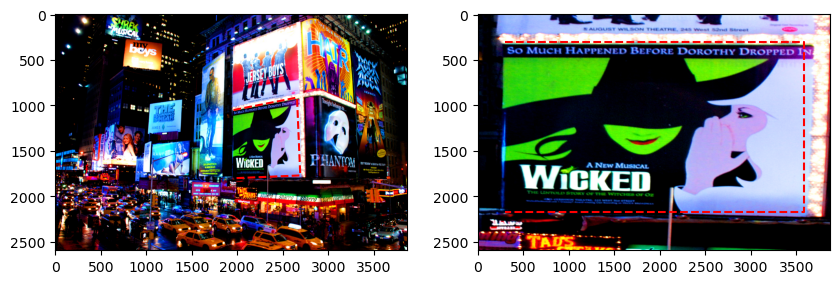

In [7]:
%matplotlib inline
#tform = transform.estimate_transform('projective', np.array(pts_src),np.array(pts_dst))
#print(tform.inverse)
transformed = warp(img,inv(H))

fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(img)
ax[0].plot(pts_src[:,0], pts_src[:,1], 'r--')
ax[1].imshow(transformed)
ax[1].plot(pts_dst[:,0], pts_dst[:,1], 'r--')
plt.show()